# **<u>Kinetyka chemiczna</u>: reakcja Braya-Liebhafsky'ego**

****
## **Spis treści** <a id="spistresci"></a>
1. [Wstęp](#wstep)
    1. [Kinetyka chemiczna $-$ wprowadzenie](#1wstep1)
    2. [Oscylacje w chemii](#2wstep2)
    3. [Krótko o historii](#3wstep3)
    4. [Cele projektu](#4wstep4)
2. [Podstawy teoretyczne](#podstawy)
    1. [Wyjaśnienie pojęć](#1teoria)
    2. [Opis modelu](#2teoria)
3. Matematyka - rozwiązanie (analityczne??), rachunki numeryczne (-> Agenda), może porównanie z jakimś kokretnym eksperymentem jak się uda znaleźć <br>
    **Agenda:**
    1. Opis układu równań 
    1. sprowadzenie do układu dwóch równań
    1. implementacja metody Gaussa 
    1. implementacja metody Runge-Kutta 
    1. porównanie obu wyników dla obu metod 
4. Podsumowanie i wnioski
5. [Bibliografia](#bibliografia)

***
## **1. Wstęp** <a id="wstep"></a>

### 1.1 Kinetyka chemiczna $-$ wprowadzenie <a id="1wstep1"></a>

Kinetyka chemiczna to dział chemii, konkretnie chemii fizycznej, badający przebieg reakcji chemicznych. Różni się jednak od termodynamiki podejściem do problemu: termodynamika pozwala przewidzieć kierunek zachodzenia reakcji czy określić jej wydajność i bilans energetyczny, ale nie zapewnia informacji o samym procesie. Kinetyka natomiast skupia się na szybkości reakcji i zmianach stężeń związków chemicznych, co pozwala zrozumieć mechanizm przebiegu reakcji i określić wpływ czynników takich jak np.: temperatura czy obecność katalizatorów na kierunek i tempo reakcji [[5](#ref5)].

### 1.2 Oscylacje w chemii <a id="2wstep2"></a>

Możliwość badania mechanizmu reakcji jest szczególnie przydatna w przypadku zajmowania się reakcjami, w których występują oscylacje stężeń. Są one ciekawym typem przemian chemicznych, ponieważ w większości zjawisk stężenia substancji biorących udział w przemianie dążą do określonego stanu równowagi i pozostają w nim, dopóki nie wpłyniemy na reakcję, np.: dodając więcej któregoś ze związków. Mimo to, w szczególnych warunkach, mogą zachodzić reakcje, w których stężenia długo oscylują wokół stanu równowagi, zanim się w nim zatrzymają. Czasami takie wahania można zaobserwować gołym okiem, przykładowo po zmianie koloru badanego roztworu - tak jak w reakcji Biełausowa-Żabotyńskiego. W innych przypadkach zmiany wizualne są zbyt subtelne i należy badać ilość substancji w odpowiednich przedziałach czasowych [[6](#ref6)]. Określając zmiany stężeń w jednostkach czasu używamy metod kinetyki chemicznej.

### 1.3 Krótko o historii <a id="3wstep3"></a>

Historycznie uważano, że oscylacje nie mają prawa występować w reakcjach chemicznych, a ich obserwacje są wynikiem przypadku lub nieodpowiedniego przygotowania do eksperymentu [[6](#ref6)]. Ponad 100 lat temu praca Wiliama C. Braya potwierdziła jednak, że wahania stężeń reagentów są możliwe nawet w roztworze jednorodnym [[7](#ref7)] i stała się inspiracją do dalszych badań nad oscylacjami w chemii. Badania nad wspomnianą reakcją utleniania-redukcji związków jodu były przez niego kontynuowane, wraz z jego uczniem $-$ Hermanem Liebhafskym [[8](#ref8)].

### 1.4 Cele projektu <a id="4wstep4"></a>

Celem naszej pracy jest przybliżenie ciekawego problemu reakcji oscylacyjnych, na przykładzie pierwszej opisanej takiej reakcji chemicznej i pokazanie, że mimo, iż sam proces przebiegający podczas reakcji Braya-Liebhafsky'ego jest skomplikowany, to można modelować go matematycznie, znacznie upraszczając zagadnienie. Pokażemy, jak można rozwiązywać układy równań różniczkowych za pomocą różnych metod numerycznych i porównamy ich wyniki oraz przedstawimy, jak wybrany przez nas model opisuje dynamikę zadanego układu chemicznego.

***
## **2. Podstawy teoretyczne** <a id="podstawy"></a>

### 2.1 Wyjaśnienie pojęć [[5](#ref5)] <a id="1teoria"></a>

Podstawową wielkością badaną w kinetyce chemicznej jest **szybkość reakcji**, oznaczana $v$. Jest ona pochodną stężenia molowego substancji po czasie: 
$$v = \pm{}\dfrac{dc}{dt} .$$
Stężenie molowe, występujące w powyższym równaniu, to miara stężenia związku chemicznego, określająca liczbę moli substancji (liczbę cząsteczek) w jednostce objętości: $c = \dfrac{n}{V}$ .

Na szybkość reakcji wpływa wiele czynników, w tym stężenie początkowe reagentów. Wynika to z prawa działania mas i pozwala zapisać **równanie kinetyczne reakcji**: 
$$v=k\cdot{}c_A^{\alpha{}}\cdot{}c_B^{\beta{}}\cdot{}c_C^{\gamma{}},$$
gdzie $A$, $B$, $C$ to substraty (czyli substancje wyjściowe), $\alpha{}$, $\beta{}$, $\gamma{}$ to liczby reagujących cząsteczek odpowiednich związków, a $k$ to **stała szybkości reakcji** (jest ona równa liczbowo szybkości reakcji, gdy stężenia $c_i$ są jednostkowe, a jej wymiar zależy od sumy wykładników $\alpha{}$, $\beta{}$, $\gamma{}$).
Na przykład reakcja $$H_2 + I_2 \xrightarrow{} 2HI$$ ma równanie kinetyczne $$v = k\cdot{}c_{H_2}\cdot{}c_{I_2}.$$

Powyższe informacje są prawdziwe dla reakcji prostych, czyli bedących elementarną przemianą chemiczną. W przypadku reakcji złożonych i wieloetapowych określenie wykładników $\alpha{}$, $\beta{}$, $\gamma{}$ nie jest już takie proste i wymaga wzięcia pod uwagę innych czynników, np.: stosunku szybkości poszczególnych reakcji elementarnych, określanego doświadczalnie. 

Równania kinetyczne są równaniami różniczkowymi pierwszego rzędu i będą podstawą przedstawionego przez nas modelu reakcji Braya-Liebhafsky'ego.

**Reakcje utleniania-redukcji** to reakcje, w których pierwiastki zmieniają stopnie utlenienia, czyli umowne wartości ładunków elementarnych, które miałby atom pierwiastka, zakładając, że wszystkie wiązania w związku chemicznym są jonowe. <br>
**Utlenianie**, inaczej oksydacja, to oddawanie elektronów przez pierwiastek i zwiększenie stopnia utlenienia. Natomiast **redukcja** to przyjmowanie elektronów przez pierwiastek i zmniejszenie stopnia utlenienia. <br>
Podczas reakcji utleniania-redukcji, inaczej reakcji redoks, liczba elektronów pobranych i oddanych przez biorące w niej udział jony musi być jednakowa [[9](#ref9)].

### 2.2 Opis modelu [[1](#ref1)] <a id="2teoria"></a>

Reakcja chemiczna rozpatrywana przez Williama Braya i poźniej również przez Hermana Liebhafsky'ego składa się z dwóch reakcji utleniania-redukcji:
$$
\begin{align}
5H_{2}O_2 + I_2 &\xrightarrow{} 2IO_3^- + 2H^+ + 4H_{2}O \\
5H_{2}O_2 + 2IO_3^- + 2H^+ &\xrightarrow{} I_2 + 5O_2 + 6H_{2}O \space{}.
\end{align}
$$
Pierwsza, reakcja (1), opisuje utlenianie się jodu cząsteczkowego do kwasu jodowego. Druga, reakcja (2), redukcję kwasu jodowego do jodu cząsteczkowego.
Po ich zsumowaniu otrzymujemy:
$$ 2 H_{2}O_2 \xrightarrow{} 2H_{2}O + O_2 \space{},$$
czyli reakcję rozkładu nadtlenku wodoru do wody i tlenu cząsteczkowego [[1](#ref1), [7](#ref7), [8](#ref8)].


W dalszej części projektu będziemy posługiwać się następującymi zmiennymi, określającymi stężenie molowe oraz dany związek chemiczny:

<div align="center">

<a id="tabela1"></a>

| Zmienna | Wzór chemiczny | Nazwa |
|:---:|:---:|:---:|
| $A$ | $IO_3^-$ | Anion jodanowy |
| $B$ | $H_{2}O_2$ | Nadtlenek wodoru |
| $C$ | $H_{2}O$ | Woda |
| $H$ | $H^+$ | Proton |
| $P$ | $HIO$ | Kwas podjodawy |
| $U$ | $HIO_2$ | Kwas jodawy |
| $V$ | $I^-$ | Anion jodkowy |
| $W$ | $O_2$ | Tlen cząsteczkowy |
| $Z$ | $I_2$ | Jod cząsteczkowy |

Tabela 1. 
</div>



Mimo że przedstawiona wyżej reakcja redoks może wydawać się prosta, to nadal nie poznano jej dokładnego przebiegu. Powstało wiele teorii układów reakcji elementarnych odpowiadających za proces odkryty przez Williama Braya. My użyjemy tego zaproponowanego w [[1](#ref1)]:

$$
\begin{align}
A + V + 2H &\xrightarrow{k_1} U + P\\
U + V + H &\xrightarrow{k_2} 2P\\
3P + U &\xrightarrow{k_3} 2U + Z + C\\
2U &\xrightarrow{k_4} P + A + H\\
Z + C &\xrightarrow{k_5} V + P + H\\
W_{(aq)} &\xrightarrow{k_6} W_{(g)}\\
Z_{(aq)} &\xrightarrow{k_7} Z_{(g)} \space{},
\end{align}
$$

gdzie duże litery odpowiadają nazwom związków zgodnie z tabelą [[1.](#tabela1)].

W przedstawianym przez nas modelu matematycznym [[1](#ref1)] zmienne stężenia $A$, $C$, $H$ i $P$ przybliżono stałymi, odpowiednio $a$, $c$, $h$ i $p$, zakładając, że zmieniają się one dostatecznie wolno. Po zastosowaniu praw kinetyki chemicznej z uwzględnieniem stałych $a$, $c$, $h$ i $p$ otrzymujemy układ czterech równań różniczkowych

$$
\begin{align}
&\dfrac{\text{d}U}{\text{d}t} = k_{1}ah^{2}V + k_{3}p^{3}U
- k_{2}hUV - k_{4}U^2 \space{},\\
&\dfrac{\text{d}V}{\text{d}t} = k_{5}cZ - k_{1}ah^{2}V - k_{2}hUV \space{},\\
&\dfrac{\text{d}Z}{\text{d}t} = k_{3}p^{3}U - (k_{5}c + k_7)Z \space{},\\
&\dfrac{\text{d}W}{\text{d}t} = -k_{6}W \space{},
\end{align}
$$
będący podstawą opisywanego modelu.

***
## **3. Matematyka**

### 3.1 Metody numeryczne
Metody numeryczne używamy kiedy rozwiązanie analityczne jest trudne lub niemożliwe do uzyskania. Wtedy przybliżamy rozwiązanie korzystając z algorytmów przybliżających wartości funkcji w danym punkcie. W tym projekcie przedstawimy metodę 
Eulera oraz metodę Rungego-Kutty czwartego rzędu (RK4).

#### Błędy obcięcia
Błąd lokalny to wielkość odchylenia w pojedyńczym kroku,
Błąd globalny to wielkość odchylenia w końcowym momencie. 

### 3.1a Metoda Eulera [[2](#ref2)]
Jedną z najprostrzych metod numerycznych jest metoda eulera, która przybliża pochodną funkcji za pomocą różnic skończonych, jest to metoda pierwszego rzędu, tzn. błąd globalny jest rzędu $O(n)$. Zakładamy że zmiana w krótkim okresie czasu (h) jest liniowa

Weźmy pewne równanie różniczkowe:

$ \dfrac{\text{d}y}{\text{d}t}= f(y, t)$

Następnie możemy przybliżyć wartość w punkcie $ t_{0} + h $ korzystając z operatora różnic skończonych, weźmy początkową wartość $ y_{0}, t_{0}$:

$ y'(t_{0} + h) = \frac{y(t_{0} + h) - y_{0}}{h} + R = f(t_{0}+h,y)$, gdzie $ R $ to reszta którą pomijamy. Stąd otrzymujemy:

$y(t_{0} + h) = y_{0} + hf(t_{0},y_{0})$

Rekurencyjnie:

$ y_{n + 1} = y_{n} + hf(t_{n}, y_{n}) $ 

dodaj skąd reszta znika i implementacje  w python 


In [3]:
def euler_method(fun, t0, y0, h, n_steps, args):
    """
            fun: funkcja przyjmująca argumenty t, y
            t0: wartość początkowa argumentu t
            y0: wartość początkowa funkcji y
            h: wielkość kroku
            n_steps: ilość kroków
            args: parametry modelu
            """
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    for i in range(n_steps):
        dy = fun(t[i], y[i], *args)
        y[i + 1] = y[i] + h * np.array(dy)
    return t, y

### 3.1b Metoda Runge-Kutty (RK4)[[3](#ref3)]
Jest to bardziej zaawansowana metoda. Wykorzystuje 4 kroki obliczeń w każdym kroku czasowym, zapewnia wysoką precyzję i stabilność. Liczymy w niej określoną ilość kroków pośrednich $ f(t_{*}, y_{*})$ dla $ t_{n} \leq t_{*} \leq  t_{n+1} $ oraz korzystamy z rozwinięcia funkcji w szereg taylora. 

Wyznaczmy 4 kroki pośrednie: 
$k_{1} = hf(x_n, y_n)$

$k_{2} = hf(x_{n} + \frac{1}{2}h, y_{n} + \frac{1}{2}k_1)$

$k_{3} = hf(x_n + \frac{1}{2}h, y_{n} + \frac{1}{2}k_2)$

$k_{4} = hf(x_{n} + h, y_{n} + k_{3})$

Końcowo otrzymujemy wzór na kolejną wartość:
$y_{n+1} = y_n + \frac{1}{6}h \left( k_1 + 2k_2 + 2k_3 + k_4 \right)$,

poniżej przedstawiam implementację w języku python

In [4]:
def rk4_method(fun, t0, y0, h, n_steps, args):
    """
                fun: funkcja przyjmująca argumenty t, y
                t0: wartość początkowa argumentu t
                y0: wartość początkowa funkcji y
                h: wielkość kroku
                steps: ilość kroków
                args: parametry modelu
                """
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    y = np.zeros((n_steps + 1, len(y0)))
    y[0] = y0
    for i in range(n_steps):
        k1 = np.array(fun(t[i], y[i], *args))
        k2 = np.array(fun(t[i] + 0.5 * h, y[i] + 0.5 * h * k1, *args))
        k3 = np.array(fun(t[i] + 0.5 * h, y[i] + 0.5 * h * k2, *args))
        k4 = np.array(fun(t[i] + h, y[i] + h * k3, *args))
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return t, y

### 3.1c Metoda Runge-Kutty (RK45) [[4](#ref7)]
W językach różnych językach programowania (m.in. Python, Matlab) bardzo często stosuje się metody RK45 do rozwiązywania równań rożniczkowych. Jest to standardowa metoda dla funkcji solve_ivp, ode_int. Jest to połączenie metody Runge-Kutty 4 rzędu którą opisałem powyżej oraz metody 5 rzędu, korzystają one  tych samych wartosci posrednich [7],  oraz dzięki temu są w stanie oszacować błąd lokalny (wartość funkcji 5 rzędu - wartość funkcji 4 rzędu). Dlaczego to jest ważne? Dzięki szacowaniu błędu jesteśmy w stanie stwierdzic czy krok który przyjeliśmy jest odpowiedni, tzn. że nie popełniamy dużego błędu. Jeśli nie jest python zmieni go automatycznie tak aby błąd był akceptowalny. (**dodaj wiecej przypisow, do tego artykulu**). Jest to bardzo wydajna technika ponieważ gdy funkcja jest niemalże stała, to możemy pozwolić sobie na większy rok i dopiero gdy trafimy na obszary dużej zmienności zmniejszamy krok. **opisz w latexie to jeszcze**

### **Rozwiązanie modelu reakcji Bray'a - Liebhafskiego czterech zmiennych** 

Skorzystamy z wbudowanej metody Runge-Kutty w funkcję solve_ivp. Warto zauważyć, że czas $t$ oraz stężenia $U,V,Z,W$ są bezwymiarowe ze względu na dobór parametrów $R_{1},...$, zgodnie z [[1](#ref1)]. Wykorzystane poniżej metody numeryczne można stosować wyłącznie w przypadkach nie-szytywnych równań różniczkowych. Rozwiązując sztywne równanie różniczkowe konieczne byłoby istotne zmniejszenie kroku, do takiego stopnia, że obliczenia mogłby być nieefektywne. 

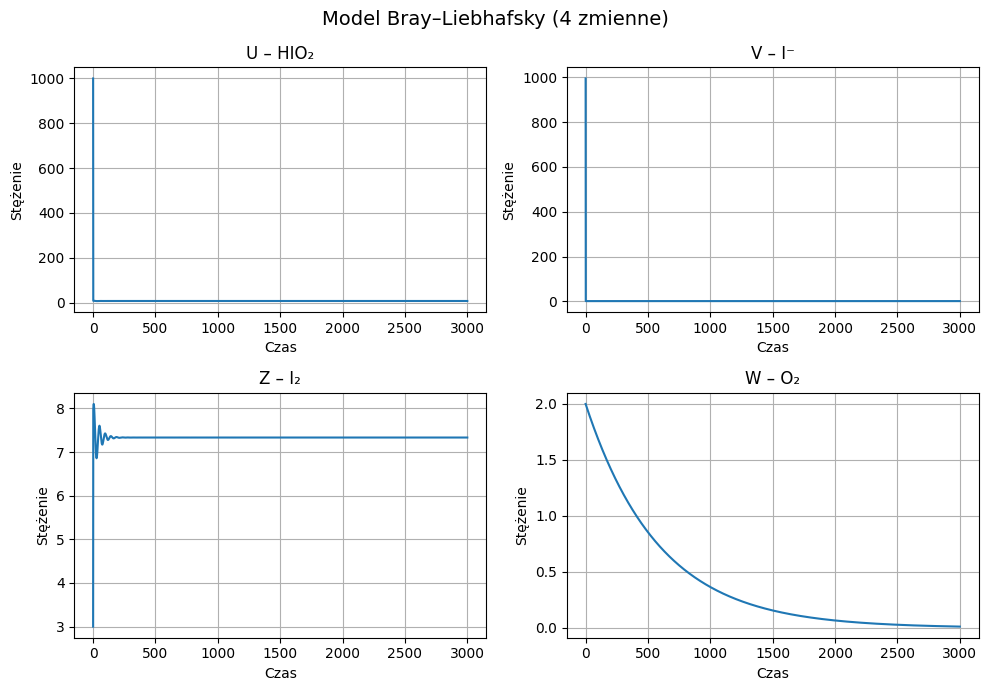

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.001e-01 ...  2.999e+03  3.000e+03]
        y: [[ 1.000e+03  8.129e+00 ...  7.408e+00  7.407e+00]
            [ 9.950e+02  1.023e+00 ...  9.907e-01  9.899e-01]
            [ 3.000e+00  7.932e+00 ...  7.334e+00  7.334e+00]
            [ 2.000e+00  1.998e+00 ...  1.221e-02  1.219e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50582
     njev: 0
      nlu: 0

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# NIE WIEM CZY PARAMETRY R SĄ ODPOWANIE
def bray_liebhafsky_model(t, y, R1, R2, R3, R4, R5, R6, R7):
    """Model różniczkowy reakcji Braya-Liebhafsky'ego
    :param t: czas ustawiany przez solver
    :param y: wartości początkowe a później wektory stanu
     U0: stężenie początkowe Kwasu jodowego III HIO₂
     V0: st. począt. Anionu jodkowego I⁻
     Z0: st. począt. Jodu cząsteczkowego I₂
     W0: st. począt. tlenu cząsteczkowego 0₂
    :param R1:= k₁ah²T
    :param R2:= k₂hMT (=1)
    :param R3:= k₃p³T
    :param R4:= k₄TM
    :param R5:= k₅cT (=1)
    :param R6:= k₆T
    :param R7:= k₇T
     a: stężenie IO₃⁻ (stała)
     c: stężenie H₂O (stała)
     h: stężenie H⁺ (stała)
     p: stężenie HIO (stała)
     T:= 1/k₅c
     M:= 1/k₂hT
     kᵢ: stałe szybkości reakcji, i={1,2,3,4,5,6,7} 
    """
    U, V, Z, W = y  # rozpakowujemy listę

    dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
    dVdt = R5 * Z - R1 * V - R2 * U * V
    dZdt = R3 * U - (R5 + R7) * Z
    dWdt = -R6 * W
    return [dUdt, dVdt, dZdt, dWdt]


def bl_model(
        U0, V0, Z0, W0,
        R1, R2, R3, R4, R5, R6, R7,
        t_max=3000,
        n_points=5000,
        method='RK45',
        plot=True
):
    """
    Symulacja modelu Bray–Liebhafsky'ego (4 zmienne)

    Parametry stanu:
    U0 – HIO2
    V0 – I-
    Z0 – I2
    W0 – O2

    Parametry kinetyczne:
    R1–R7 – parametry modelu

    Parametry numeryczne:
    t_max – czas końcowy
    n_points – liczba punktów czasowych
    method – metoda całkowania
    plot – czy rysować wykres
    """

    y0 = [U0, V0, Z0, W0]
    t_span = (0, t_max)
    t_eval = np.linspace(0, t_max, n_points)

    sol = solve_ivp(
        bray_liebhafsky_model,
        t_span,
        y0,
        args=(R1, R2, R3, R4, R5, R6, R7),
        t_eval=t_eval,
        method=method
    )

    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))

        axs[0, 0].plot(sol.t, sol.y[0])
        axs[0, 0].set_title('U – HIO₂')

        axs[0, 1].plot(sol.t, sol.y[1])
        axs[0, 1].set_title('V – I⁻')

        axs[1, 0].plot(sol.t, sol.y[2])
        axs[1, 0].set_title('Z – I₂')

        axs[1, 1].plot(sol.t, sol.y[3])
        axs[1, 1].set_title('W – O₂')

        for ax in axs.flat:
            ax.set_xlabel('Czas')
            ax.set_ylabel('Stężenie')
            ax.grid(True)

        fig.suptitle('Model Bray–Liebhafsky (4 zmienne)', fontsize=14)
        fig.tight_layout()
        plt.show()

    return sol 

U0 = 1000
V0 = 995
Z0 = 3
W0 = 2

R1 = 0.0035
R2 = 1.0
R3 = 1.01
R4 = 0.0028
R5 = 1.0
R6 = 0.0017
R7 = 0.02
bl_model(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7)


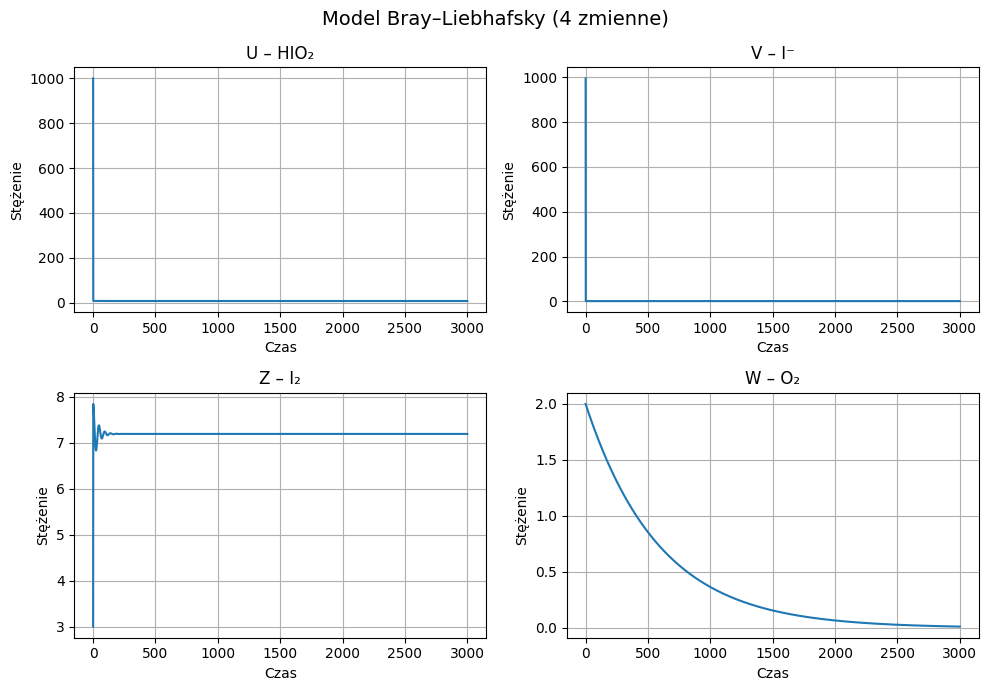

In [37]:
bl_model(U0, V0, Z0, W0, R1, R2, 1, R4, R5, R6, R7)

***
## **Redukcja do modelu dwóch zmiennych **
Łatwo widać, że zmienna $W$ występuje tylko w swoim własnym równaniu więc jest niezależna od reszty zmiennych, natomiast wg [[1](#ref1)] możemy aproksymować czymś tam zmieniamy na dwie zmienne. 

### **Porównanie metod RK4, RK45 oraz Eulera**
W tej części pokażemy jak różnią się rozwiązania równań w zależności od przyjętej metody numerycznej. w tym celu pokażemy rozwiązania numeryczne metody Eulera, Runge-Kutty 4 oraz Runge-Kutty 45. 

In [12]:
def bl_model_euler_rk(
        U0, V0, Z0, W0,
        R1, R2, R3, R4, R5, R6, R7,
        t_max=3000,
        step=0.001,
        rk4=True,
        plot=True
):
    y0 = [U0, V0, Z0, W0]

    n_steps = int(t_max / step)
    if rk4:
        sol_t, sol_y = rk4_method(bray_liebhafsky_model, 0, y0, step, n_steps, (R1, R2, R3, R4, R5, R6, R7))
    else:
        sol_t, sol_y = euler_method(bray_liebhafsky_model, 0, y0, step, n_steps,
                                    (R1, R2, R3, R4, R5, R6, R7))
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(10, 7))

        axs[0, 0].plot(sol_t, sol_y[:, 0])
        axs[0, 0].set_title('U – HIO₂')

        axs[0, 1].plot(sol_t, sol_y[:, 1])
        axs[0, 1].set_title('V – I⁻')

        axs[1, 0].plot(sol_t, sol_y[:, 2])
        axs[1, 0].set_title('Z – I₂')

        axs[1, 1].plot(sol_t, sol_y[:, 3])
        axs[1, 1].set_title('W – O₂')

        for ax in axs.flat:
            ax.set_xlabel('Czas')
            ax.set_ylabel('Stężenie')
            ax.grid(True)

        fig.suptitle('Model Bray–Liebhafsky (4 zmienne) euler/rk4', fontsize=14)
        fig.tight_layout()
        plt.show()
        return sol_t, sol_y
    else:
        return sol_t, sol_y

        
def bl_model_comparssion(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7, step=0.001, t_max=3000):
    """Porównamy 3 przedstawione modele na wykresach"""
    rk45 = bl_model(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7, plot=False, t_max=t_max)
    euler_t, euler_y = bl_model_euler_rk(U0, V0, Z0, W0,
                                         R1, R2, R3, R4, R5, R6, R7,
                                         t_max=t_max,
                                         step=step,
                                         rk4=False,
                                         plot=False)
    rk4_t, rk4_y = bl_model_euler_rk(U0, V0, Z0, W0,
                                     R1, R2, R3, R4, R5, R6, R7,
                                     t_max=t_max,
                                     step=step,
                                     rk4=True,
                                     plot=False)

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].plot(rk45.t, rk45.y[0], label="RK45")
    axs[0, 0].plot(euler_t, euler_y[:, 0], color="orange", label="euler")
    axs[0, 0].plot(rk4_t, rk4_y[:, 0], color="red", label="RK4")
    axs[0, 0].set_title('U – HIO₂')

    axs[0, 1].plot(rk45.t, rk45.y[1])
    axs[0, 1].plot(euler_t, euler_y[:, 1], color="orange")
    axs[0, 1].plot(rk4_t, rk4_y[:, 1], color="red")
    axs[0, 1].set_title('V – I⁻')

    axs[1, 0].plot(rk45.t, rk45.y[2])
    axs[1, 0].plot(euler_t, euler_y[:, 2], color="orange")
    axs[1, 0].plot(rk4_t, rk4_y[:, 2], color="red")
    axs[1, 0].set_title('Z – I₂')

    axs[1, 1].plot(rk45.t, rk45.y[3])
    axs[1, 1].plot(euler_t, euler_y[:, 3], color="orange")
    axs[1, 1].plot(rk4_t, rk4_y[:, 3], color="red")
    axs[1, 1].set_title('W – O₂')
    fig.suptitle('Model Bray–Liebhafsky porownanie metod', fontsize=14)
    fig.tight_layout()
    fig.legend()
    plt.show()
    return None

C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:32: RuntimeWarning: overflow encountered in scalar multiply
  dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:32: RuntimeWarning: overflow encountered in scalar power
  dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:33: RuntimeWarning: overflow encountered in scalar multiply
  dVdt = R5 * Z - R1 * V - R2 * U * V
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  dVdt = R5 * Z - R1 * V - R2 * U * V
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  dZdt = R3 * U - (R5 + R7) * Z


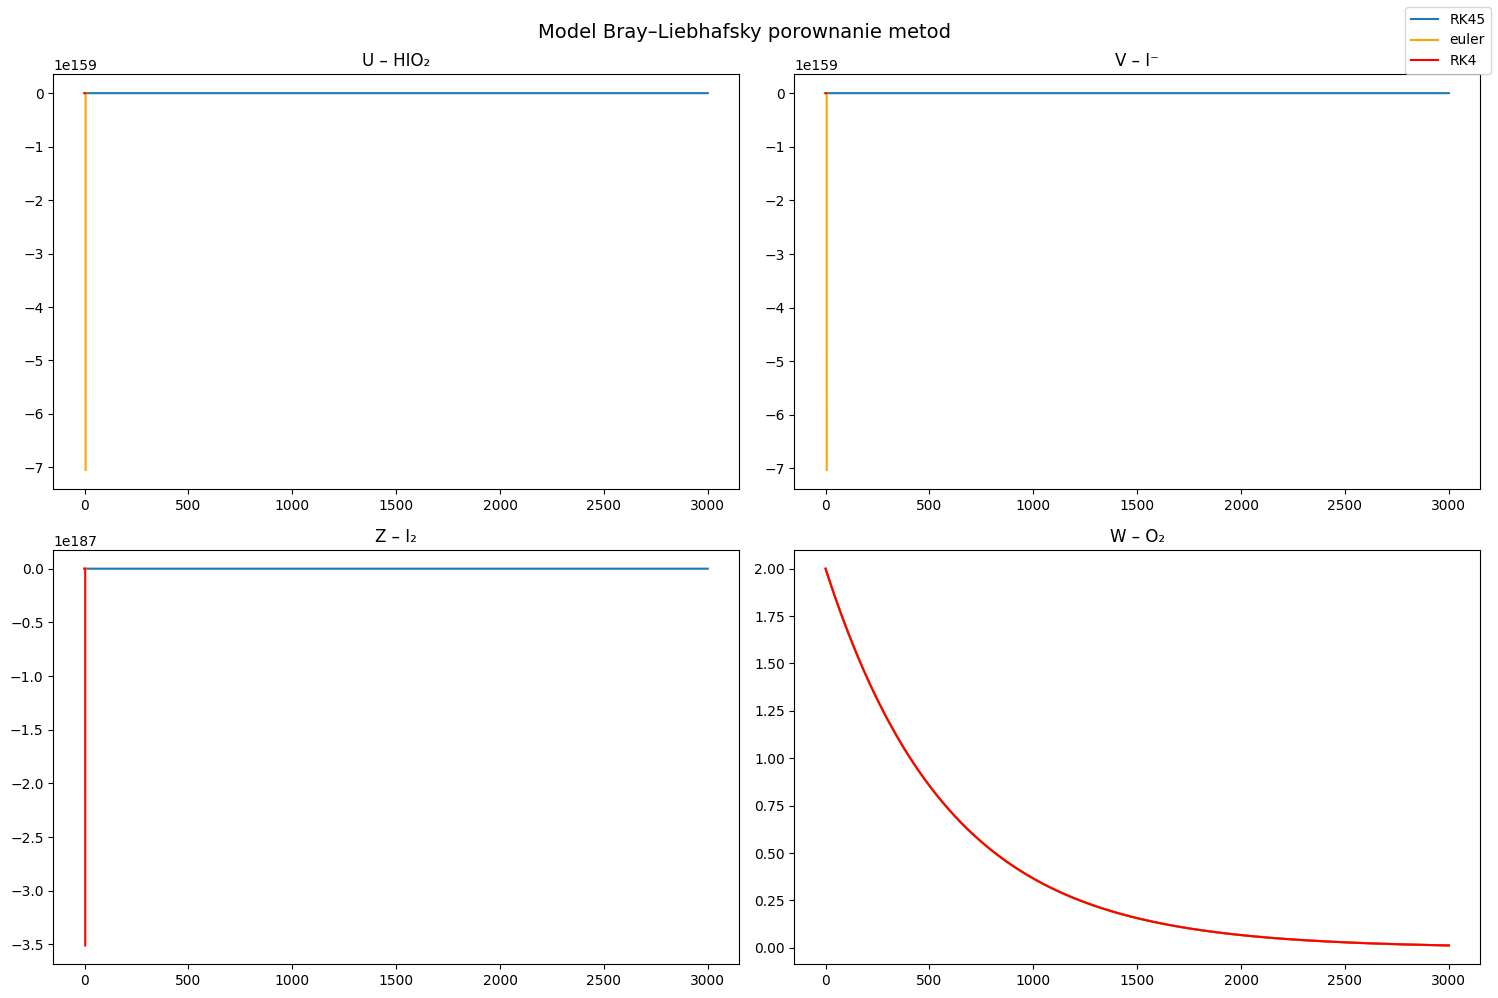

In [13]:
U0 = 10  # 00
V0 = 9  # 95
Z0 = 3
W0 = 2

R1 = 0.0035
R2 = 1.0
R3 = 1.99
R4 = 0.0028
R5 = 1.0
R6 = 0.0017
R7 = 0.02
bl_model_comparssion(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7, step=0.1, t_max=3000)


Jak widać tak duży krok powoduje problemy numeryczne dla metody eulera oraz runge-kutty, należy zwiększyć krok. Dzieję się to dlatego że metoda eulera oraz runge kutty przeszacowują wartosc funkcji, co przy małym kroku może skutkować wyjściem poza zakres dostępnych liczb. Metody numeryczne zachowują się niestabilnie (**sprwadz to**) Jest to szczególnie istotne kiedy mamy do czynienia z funkcjami które są gwałtownie rosną tak jak część wykresów z reakcji Braya-Liebhafskiego. 

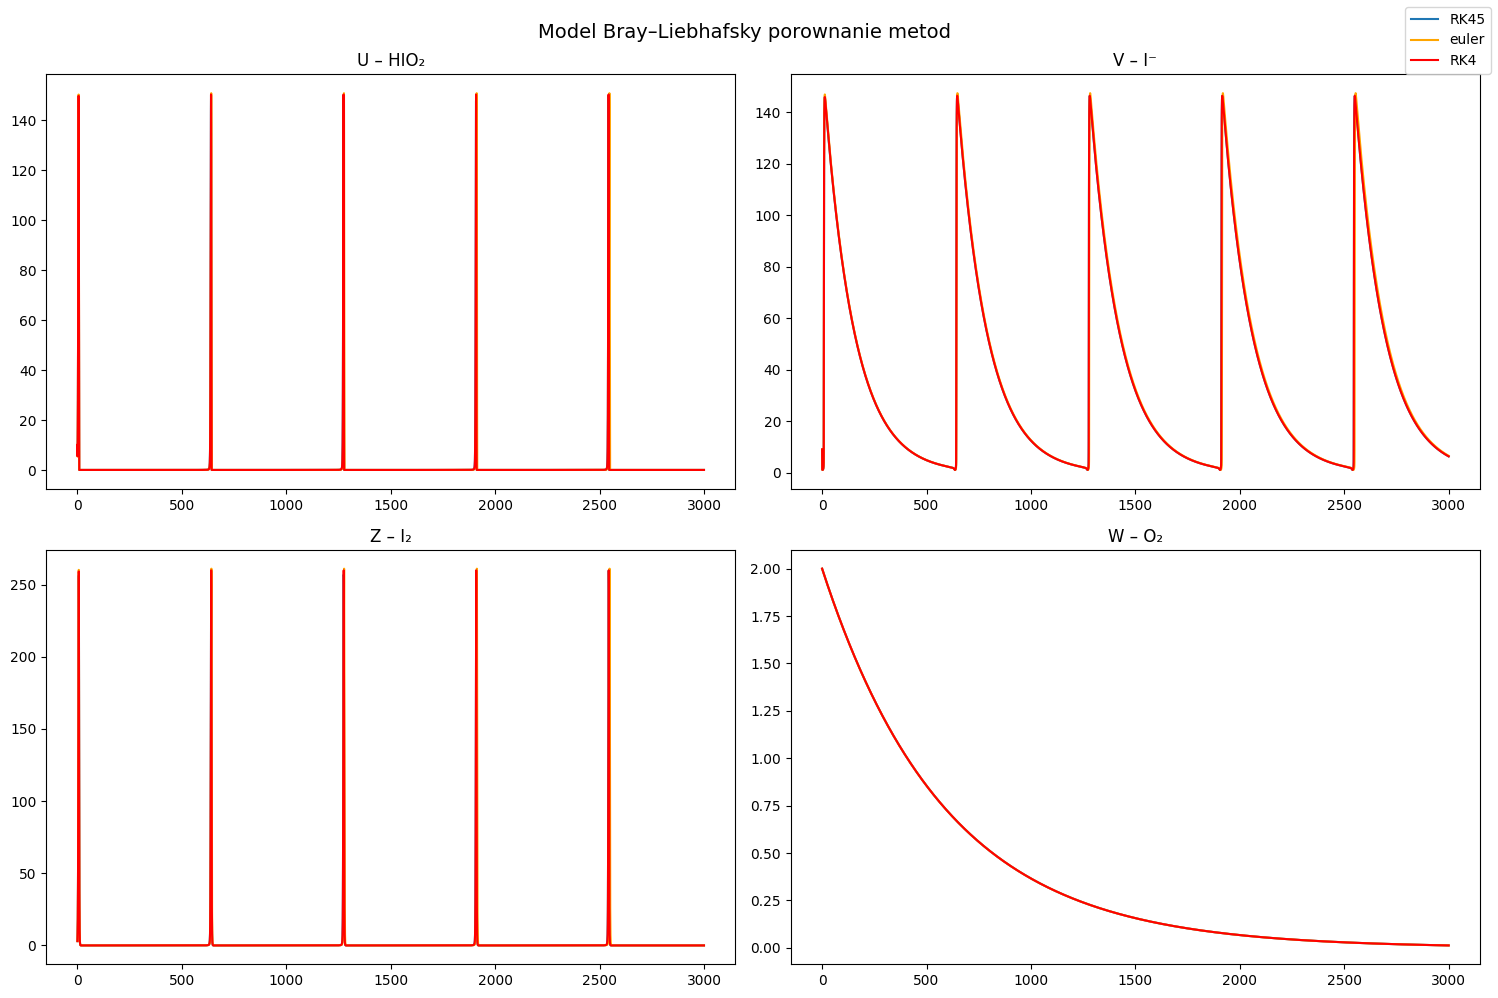

In [15]:
bl_model_comparssion(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7, step=0.014, t_max=3000)

Dopiero dla kroku niższego o rząd wielkości otrzymujemy wyniki podobne jak z pierwszej symulacji metodą rk45 z adaptacyjnym krokiem (**zmien na adaptacyjny wcześniej**). 

C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:32: RuntimeWarning: overflow encountered in scalar multiply
  dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:32: RuntimeWarning: overflow encountered in scalar power
  dUdt = R1 * V + R3 * U - R2 * U * V - R4 * U ** 2
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:33: RuntimeWarning: overflow encountered in scalar multiply
  dVdt = R5 * Z - R1 * V - R2 * U * V
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  dVdt = R5 * Z - R1 * V - R2 * U * V
C:\Users\karol\AppData\Local\Temp\ipykernel_7652\62730289.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  dZdt = R3 * U - (R5 + R7) * Z


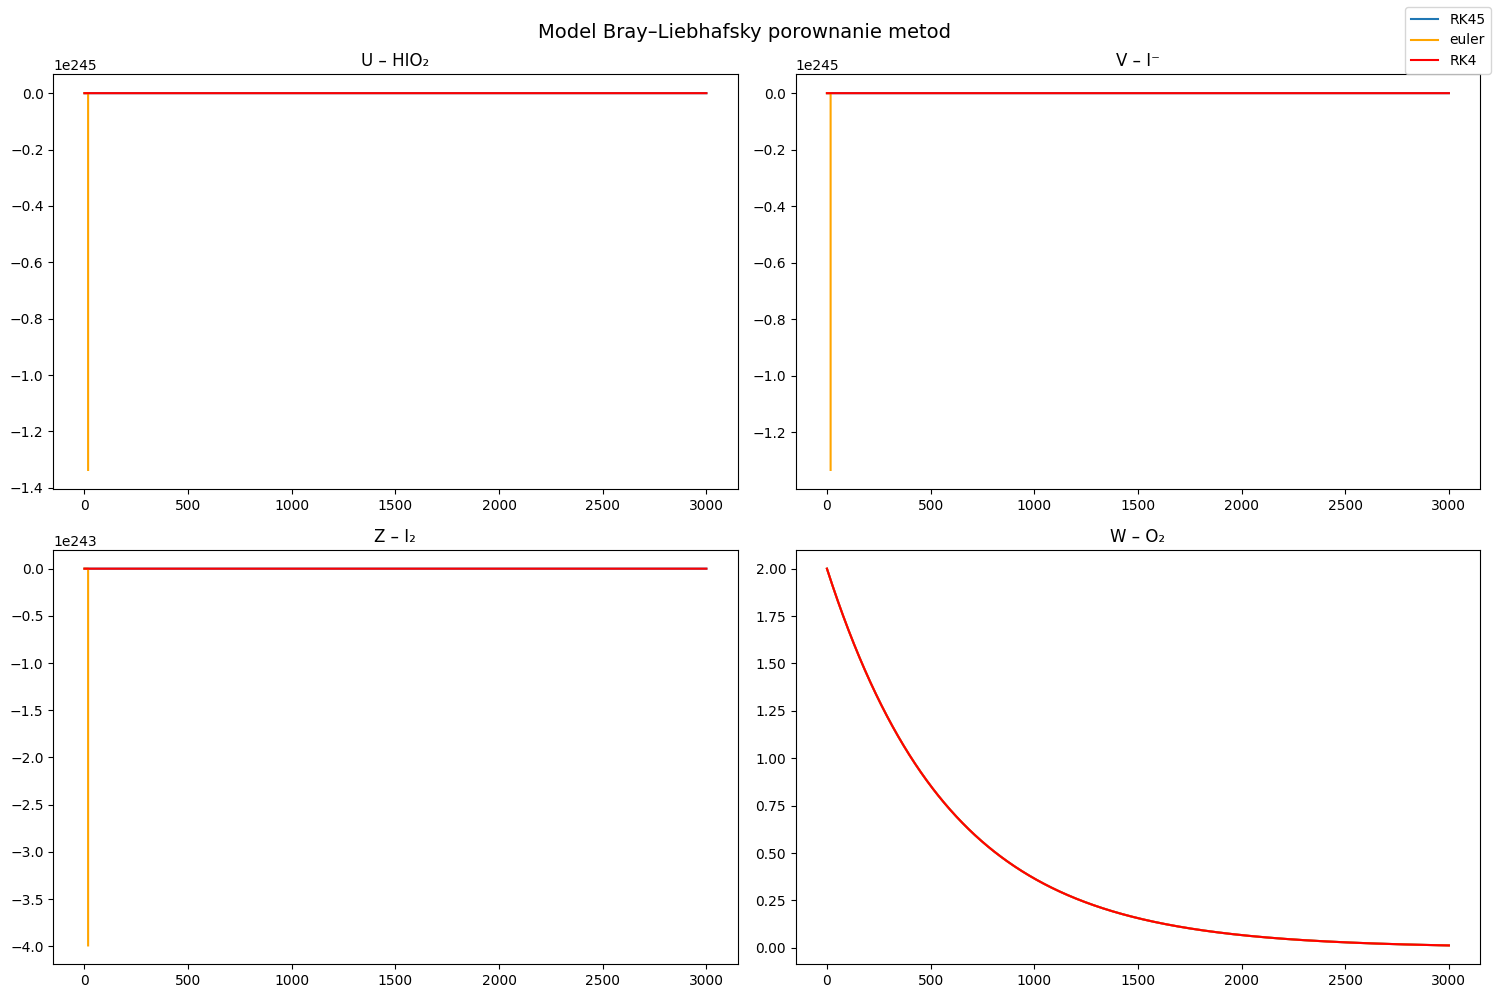

In [20]:
bl_model_comparssion(U0, V0, Z0, W0, R1, R2, R3, R4, R5, R6, R7, step=0.015, t_max=3000)

Co ciekawe zmiana kroku z 0.14 do 0.15 uniemożliwia uzyskanie poprawnego wyniku. 

Aby lepiej pokazać różnicę błędów dla metody rk4 i eulera wyliczę błąd globalny, gdzie punktem odniesienia będzie RK45 z adaptacyjnym krokiem. 

***
## **4. Podsumowanie i wnioski**

Mądre matematyczne wnioski

***
## **5. Bibliografia** <a id="bibliografia"></a>
<a id="ref1"></a> 
[1].  Lawrence K. Forbes, Andrew P. Bassom, Courtney Quinn, A mathematical model of the Bray–Liebhafsky reaction, data dostępu: 26.12.2025 [link](https://royalsocietypublishing.org/rspa/article/480/2290/20230964/66721/A-mathematical-model-of-the-Bray-Liebhafsky)

<a id="ref2"></a>
[2]. Płociniczak Ł. "Skrypt do równań różniczkowych", 3.2. Euler's method, data dostępu:  [link](https://www.bing.com/search?qs=HS&pq=p%c5%82o&sk=CSYN1UAS9LS6AS5&sc=25-3&q=p%C5%82ociniczak+pwr&cvid=eaac520e4e03451fb99e306b7df2d9f8&gs_lcrp=EgRlZGdlKgkIABBFGDsY-QcyCQgAEEUYOxj5BzIGCAEQRRg7MgYIAhBFGDkyBggDEC4YQDIGCAQQLhhAMgYIBRAAGEAyBggGEEUYPTIGCAcQRRg9MgYICBBFGD3SAQgxNTc0ajBqOagCCLACAQ&FORM=ANAB01&PC=DCTS&ntref=1)

<a id="ref3"></a>
[3]. data dostępu: [link](https://sundnes.github.io/solving_odes_in_python/ode_book.pdf)

<a id="ref4"></a>
[4]. Markdown for Jupyter notebooks cheatsheet, data dostępu: 31.12.2025 [link](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet) - **chyba to potem usuniemy, ale może się jeszcze przyda**

<a id="ref5"></a>
[5]. Aleksander Kufelnicki, Marian J. Surma, Chemia fizyczna : (wykłady) : skrypt dla studentów Wydziału Farmaceutycznego i Oddziału Medycyny Laboratoryjnej, data dostępu: 31.12.2025 [link](https://cybra.lodz.pl/dlibra/publication/14769/edition/11761/content)

<a id="ref6"></a>
[6]. Ewa Gudowska-Nowak, Reakcje oscylacyjne, data dostępu: 31.12.2025 [link](https://foton.if.uj.edu.pl/documents/12579485/505ff143-d76b-469e-8911-a0bfee7ddb09)

<a id="ref7"></a>
[7]. William C. Bray, A periodic reaction in homogeneous solution and its relation to catalysis, data dostępu: 3.01.2026 [link](https://pubs.acs.org/doi/abs/10.1021/ja01439a007)

<a id="ref8"></a>
[8]. William C. Bray, Herman Liebhafsky, Reactions involving hydrogen peroxide, iodine and iodate ion, data dostępu: 4.01.2026 [link](https://pubs.acs.org/doi/abs/10.1021/ja01352a006)

<a id="ref9"></a>
[9]. Maria Litwin, Szarota Styka-Wlazło, Joanna Szymońska, To jest chemia 1: Chemia ogólna i nieorganiczna, Zakres rozszerzony, data wydania: 2019

[*Wróć do początku*](#spistresci)